# Factor Graph

## Formulate SLAM as a Factor Graph
Factor graph is a nice representation for optimization problems:

$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}\prod_i \Phi_i\\
=& \underset{X}{\operatorname{argmax}}\prod_i \phi_i(X, Z)
\end{align}
$$

A simple factor graph is shown below. Circles represent state variables, e.g robot poses, and squares represent constraints among variables, e.g. relative transformation. The corresponding optimization problem is:
$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}\prod_{i=0}^3 \Phi_i\\
=& \underset{X}{\operatorname{argmax}}\phi_0(z_0; x_0, x_1)\phi_1(z_1; x_0, x_2)\phi_2(z_2; x_1, x_2)\phi_3(z_3; x_2)
\end{align}
$$
where $x$ are state variables to be optimized, and $z$ are observations related to states though a factor potential. 

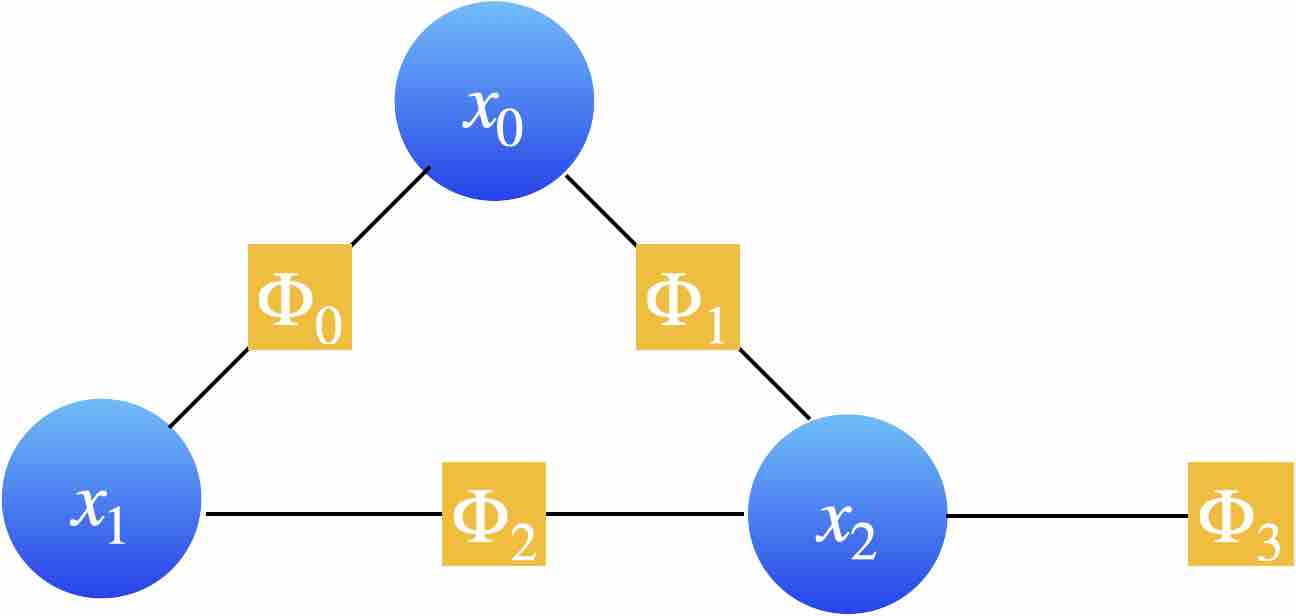

In [8]:
# A factor graph
from IPython.display import Image
Image('img/simple-factor-graph.jpg', width=480)
#

Most of SLAM algorithms use probability distributions, e.g. Gaussian distribution, as factor potentials $\Phi$. For example, 
$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}\prod_{i=0}^3 \Phi_i\\
=& \underset{X}{\operatorname{argmax}}\phi_0(z_0; x_0, x_1)\phi_1(z_1; x_0, x_2)\phi_2(z_2; x_1, x_2)\phi_3(z_3; x_2) \\
=& \underset{X}{\operatorname{argmax}} p_0(z_0; x_0, x_1)p_1(z_1; x_0, x_2)p_2(z_2; x_1, x_2)p_3(z_3; x_2) \\
\end{align}
$$

The formulation above can also be viewed as a MLE.
$$
\begin{align}
p(x_0,x_1,x_2,z_0,z_1,z_2,z_3) =& p(x_1,x_2,z_0,z_1,z_2,z_3|x_0) p(x_0) \\
=& p(x_2,z_0,z_1,z_2,z_3|x_1,x_0)p(x_1|x_0)p(x_0)\\
=& p(z_0,z_1,z_2,z_3|x_2, x_1,x_0)p(x_2|x_1, x_0)p(x_1)p(x_0)\\
=& p(z_1,z_2,z_3|z_0, x_2, x_1, x_0) p(z_0 | x_2, x_1, x_0)p(x_2)p(x_1)p(x_0)\\
=& p(z_1,z_2,z_3|z_0, x_2, x_1, x_0) p(z_0 |x_1, x_0)p(x_2)p(x_1)p(x_0) \\
=& p_0(z_0| x_0, x_1)p_1(z_1| x_0, x_2)p_2(z_2| x_1, x_2)p_3(z_3| x_2)p(x_2)p(x_1)p(x_0)\\
p(x_0,x_1,x_2,z_0,z_1,z_2,z_3) \propto& p_0(z_0| x_0, x_1)p_1(z_1| x_0, x_2)p_2(z_2| x_1, x_2)p_3(z_3| x_2)
\end{align}
$$

Then 
$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}p(x_0,x_1,x_2,z_0,z_1,z_2,z_3)\\
=& \underset{X}{\operatorname{argmax}}p_0(z_0| x_0, x_1)p_1(z_1| x_0, x_2)p_2(z_2| x_1, x_2)p_3(z_3| x_2) \\
\end{align}
$$

If we assume the factor potentials are Gaussian distribution whose mean is the residual between observation and prediction based on potential function, then the factor graph can be converted to be a least square problem. For converting non-Gaussian distribution into least square problems, see [Mixture models for least square optimization]({% post_url 2021-05-11-paper-reading-mixture-models-for-least-square-optimization %}).

$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}\prod_{i=0}^3 \Phi_i\\
=& \underset{X}{\operatorname{argmax}}\phi_0(z_0; x_0, x_1)\phi_1(z_1; x_0, x_2)\phi_2(z_2; x_1, x_2)\phi_3(z_3; x_2) \\
=& \underset{X}{\operatorname{argmax}} p_0(z_0; x_0, x_1)p_1(z_1; x_0, x_2)p_2(z_2; x_1, x_2)p_3(z_3; x_2) \\
=& \underset{X}{\operatorname{argmax}} \mathcal{N}(z_0-f_0(x_0, x_1), \Sigma_0)
\mathcal{N}(z_1-f_1(x_0, x_2), \Sigma_1) \mathcal{N}(z_2-f_2(x_1, x_2), \Sigma_2)\mathcal{N}(z_3-f_3(x_2), \Sigma_3)\\
\propto& \underset{X}{\operatorname{argmax}} log(\mathcal{N}(z_0-f_0(x_0, x_1), \Sigma_0)
\mathcal{N}(z_1-f_1(x_0, x_2), \Sigma_1) \mathcal{N}(z_2-f_2(x_1, x_2), \Sigma_2)\mathcal{N}(z_3-f_3(x_2), \Sigma_3)\\
=&\|z_0-f_0(x_0, x_1)\|^2_{\Sigma_0} + \|z_1-f_1(x_0, x_2)\|^2_{\Sigma_1} + \|z_2-f_2(x_0, x_1)\|^2_{\Sigma_2} + \|z_3-f_3(x_2)\|^2_{\Sigma_3}
\end{align}
$$

## Gauss-Newton Optimization

## Cholesky Factorization

## Incremental Cholesky Factorization

## Incremental Smoothing and Mapping

Reference:

1. Wang, High Availability Mapping and Localization
2. Dellaert, Factor Graphs for Robot Perception